<a href="https://colab.research.google.com/github/laym0ura/projetos_ciencia_de_dados/blob/main/DESAFIO_IFOOD_DE_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CONTEXTO ANALÍTICO

Vejam estas notícias:

Dados públicos de abril/21 - Em 2021, a empresa atingiu uma nova marca de 60 milhões de pedidos mensais. Crescimento de 100% em um ano; mais de 110.000 restaurantes se inscreveram na plataforma nos últimos 12 meses. Só em março, o mês mais letal da pandemia para o Brasil, 270 mil restaurantes operavam com a plataforma iFood.

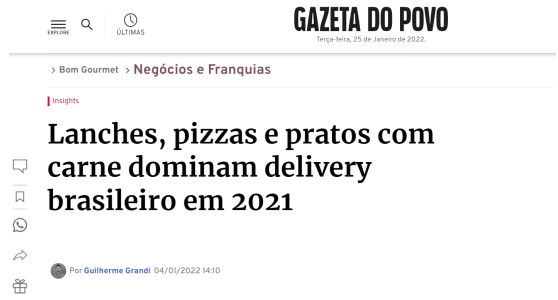

Fonte: labsnews.com/en/articles/business/ifood-60-million-monthly-orders-amid-the-pandemic/

 … o iFood confirma a preferência pelos hambúrgueres no delivery. Foram, em média, quatro unidades por segundo, totalizando mais de 100 milhões de pedidos de opções como x-tudo, x-bacon, hambúrguer, x-burguer e x-salada.

…E, no iFood, conveniência de comprar marmitas prontas também entrou no ranking dos 10 mais pedidos pelos clientes.

Fonte: www.gazetadopovo.com.br/bomgourmet/negocios-e-franquias/mais-pedidos-delivery-2021

… “De zero a dez, quanto você recomendaria esta empresa a um parente ou amigo?” …. o método de “promoção e/ou programa de fidelidade” é desaprovado por 30,5% dos respondentes, seguido de agilidade e tempo de entrega (17,7%) e facilidade do uso dos aplicativos (14,0%). Em contrapartida, a qualidade de produtos é a característica mais aprovada pelos respondentes, com 93,2% de “likes”, seguida dos próprios restaurantes e estabelecimentos (89,0%) e entrega e/ou entregadores (86,9%).

A pergunta que dá vida à medição de NPS, de qualidade no atendimento, mostra o iFood como o aplicativo de delivery com melhor avaliação do mercado, com nota 59,8.

Quando o assunto é popularidade, o iFood segue sendo o aplicativo mais citado pelos respondentes, com 91,6% de citações.

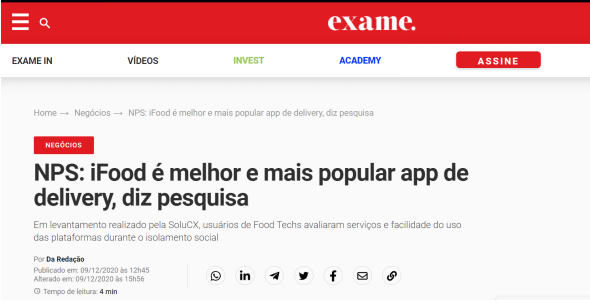

Fonte: exame.com/negocios/nps-ifood-e-melhor-e-mais-popular-app-de-delivery-diz-pesquisa/

A diversidade e amplitude de clientes que utilizam a plataforma do iFood é gigante - a cobertura do aplicativo se estende por muitas geografias no Brasil, de múltiplos gostos, regionalismos e bolsos. Alguns buscam uma experiência no momento da refeição, outros só querem receber a marmita na hora certa para não se atrasar para a primeira reunião pós-almoço.

Neste contexto, o ifood precisa entender melhor seus clientes! Quem é o mais fiel e quem mais compra com ele? Quem mais gosta de cupom? Quem gosta de entrega grátis? Qual o padrão de consumo? Qual o padrão de comportamento? Quanto os clientes vão gastar? Onde?

Para resolver algumas perguntas, utilizei a base de dados de pedidos fornecida pelo próprio Ifood.
As variáveis contidas nela são:

**order_id**: ID único do pedido

**order_shift**: 

0 - 4:59h - weekday/weekend dawn

5 - 9:59h - weekday/weekend breakfast

10 - 14:59h - weekday/weekend lunch

15 - 16:59h - weekday/weekend snack

17 - 23:59h - weekday/weekend dinner

**order_origin**: Tipo do Merchant: STORE (loja), QUICKLY_MEAL (refeição rápida e barata), RESTAURANT (restaurante)

**delivery_fee**: Taxa de entrega paga pelo cliente

**scheduled**: Booleano que indica se o pedido foi agendado

**total_amount**: Valor total pago pelo cliente (em Unidades Monetárias UM)

**subsidy_amount**: Subsídio, desconto dado no pedido (em Unidades Monetárias UM) 

**device_platform**: Plataforma (sistema operacional) utilizado para fazer o pedido (ANDROID, DESKTOP, etc)

**device_type**: Canal de origem do pedido (SITE, MOBILE, etc)

**device_app_version**: Versão do aplicativo do iFood que fez o pedido

**centroid_id**: Id da centroide do clientes

**state_label**: Sigla da UF do cliente

**city**: Cidade do cliente

**district**: Bairro do cliente

**customer_long**: Longitude do cliente (até 2ª casa decimal) - ~1km

**customer_lat**: Latitude do cliente (até 2ª casa decimal) - ~1km

**restaurant_id**: Identificador do restaurante

**dish_type**: Tipo de cozinha

**group_id**: Se o restaurante fizer parte de um grupo, essa é a identificação do grupo

**merchant_centroid_id**: Id da centroide

**merchant_state**: Sigla do UF do Merchant

**merchant_city**: Cidade do Merchant

**merchant_district**: Distrito do Merchant

**merchant_zipcode**: CEP do Merchant

**merchant_long**: Longitude do Merchant (até 2ª casa decimal)

**merchant_lat**: Latitude do Merchant (até 2ª casa decimal)

**has_free_delivery**: Booleano que indica se o pedido foi entrega gratis

**confirmed_date**: Data que o pedido foi confirmado pelo restaurante

**concluded_date**: Data em que o pedido foi concluído

**lag_last_order**: Tempo em dias entre o pedido atual e o último pedido do cliente 

**account_id**: ID do usuário


IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv('orders.csv', sep=';')

#ANÁLISE EXPLORATÓRIA DE DADOS

LENDO AS PRIMEIRAS 5 LINHAS DO DATA FRAME

In [3]:
df.head()

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,...,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at
0,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,875.0,False,5375.0,0.00,ANDROID,MOBILE,9.39.1,...,-43.38,-22.83,False,2020-02-28T14:07:25.953Z,2020-02-28T16:06:03.701Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8,2020-02-28T19:06:31.861Z
1,0018ed39-3ae0-4047-9c9e-fd9a2027e645,weekend dinner,RESTAURANT,0.0,False,2987.5,1250.00,IOS,MOBILE,9.63.0,...,-43.22,-22.93,True,2020-08-21T21:12:23.295Z,2020-08-21T21:59:18.732Z,1.0,407bab9f-f485-48cd-abea-66e6283058c3,5.0,8,2020-09-04T00:14:14.365Z
2,00214248-5a2d-4333-a919-c1f3afd31389,weekday dinner,RESTAURANT,0.0,False,3737.5,2123.75,IOS,MOBILE,9.56.0,...,-46.67,-23.62,True,2020-07-02T20:21:51.900Z,2020-07-02T20:53:39.176Z,3.0,a16865d2-a3ca-4251-afab-083dadeb06e9,5.0,5,2020-07-03T03:49:03.214Z
3,007199e6-6be4-42d0-986c-a0de7650dc80,weekday dinner,RESTAURANT,862.5,False,2237.5,1.25,DESKTOP,SITE,8.39.0,...,-43.40,-22.96,False,2020-08-19T20:16:16.718Z,2020-08-19T22:16:16.298Z,0.0,a7f00fd8-d5d6-4604-9bce-ffe35b16848d,5.0,10,2020-08-26T17:44:08.137Z
4,00bb6d10-0a9b-4fe3-9b25-8d18f50bcc3a,weekday lunch,RESTAURANT,0.0,False,2750.0,0.00,DESKTOP,SITE,8.12.0,...,-46.64,-23.59,True,2020-04-15T13:01:55.231Z,2020-04-15T17:02:37.723Z,1.0,63284037-3ade-4600-88e9-5009b9504d8f,5.0,10,2020-04-17T22:05:13.983Z


In [4]:
df.shape

(226269, 34)

O DataFrame possui 226.269 linhas e 34 colunas.

Usando o describe para gerar estatísticas descritivas:

In [5]:
df.describe()

,delivery_fee,total_amount,subsidy_amount,customer_long,customer_lat,merchant_zipcode,merchant_long,merchant_lat,lag_last_order,review_score,nps_score
count,226269.000000,226269.000000,226269.000000,226269.000000,226269.000000,2.262690e+05,226269.000000,226269.000000,226085.000000,226269.000000,226269.000000
mean,405.418965,6017.809350,343.687580,-45.693016,-23.192878,1.693620e+07,-45.692937,-23.193716,2.505275,4.666207,9.108150
std,504.026635,5180.780032,677.852181,2.184032,2.206372,2.094803e+07,2.194552,2.206171,11.985040,0.928577,1.895903
min,-1247.500000,0.000000,-2.500000,-67.870000,-31.780000,0.000000e+00,-67.840000,-31.780000,0.000000,1.000000,1.000000
25%,0.000000,2768.750000,0.000000,-46.710000,-23.600000,4.048000e+06,-46.700000,-23.600000,0.000000,5.000000,9.000000
50%,0.000000,4500.000000,0.000000,-46.620000,-23.530000,6.473073e+06,-46.620000,-23.540000,1.000000,5.000000,10.000000
75%,748.750000,7523.750000,623.750000,-43.350000,-22.940000,2.222003e+07,-43.350000,-22.950000,2.000000,5.000000,10.000000
max,5000.000000,174873.750000,19611.250000,-34.820000,2.850000,9.907006e+07,46.790000,2.850000,1429.000000,5.000000,10.000000


Pode-se notar que o mínimo para as variáveis delivery_fee e subsidy_amount estão negativos. Isso é uma inconsistência no dado, visto que se tratam de variáveis que são valores em dinheiro. 

Outra coisa notável é a média do valor de delivery, do total do pedido e do desconto. Estão com valores muito altos, o que não condiz com a realidade do negócio. O que significa que o valor não está em reais e sim em centavos.

REMOVENDO VALORES NEGATIVOS DAS VARIÁVEIS

In [6]:
indexNames = df[ df['delivery_fee'] < 0 ].index
df.drop(indexNames , inplace=True)
indexNames2 = df[ df['subsidy_amount'] < 0 ].index
df.drop(indexNames2 , inplace=True)

In [7]:
df.describe()

,delivery_fee,total_amount,subsidy_amount,customer_long,customer_lat,merchant_zipcode,merchant_long,merchant_lat,lag_last_order,review_score,nps_score
count,220731.000000,220731.000000,220731.000000,220731.000000,220731.000000,2.207310e+05,220731.000000,220731.000000,220550.000000,220731.000000,220731.000000
mean,393.766802,6017.262624,352.333389,-45.693545,-23.191916,1.696268e+07,-45.693466,-23.192753,2.512074,4.665638,9.103760
std,500.894057,5176.951928,684.062705,2.185854,2.211896,2.098493e+07,2.196597,2.211684,12.063733,0.929019,1.900023
min,0.000000,0.000000,0.000000,-67.870000,-31.780000,0.000000e+00,-67.840000,-31.780000,0.000000,1.000000,1.000000
25%,0.000000,2750.000000,0.000000,-46.700000,-23.600000,4.046500e+06,-46.700000,-23.600000,0.000000,5.000000,9.000000
50%,0.000000,4500.000000,0.000000,-46.620000,-23.530000,6.455030e+06,-46.620000,-23.540000,1.000000,5.000000,10.000000
75%,748.750000,7562.500000,623.750000,-43.350000,-22.940000,2.222003e+07,-43.350000,-22.940000,2.000000,5.000000,10.000000
max,5000.000000,174873.750000,19611.250000,-34.820000,2.850000,9.907006e+07,46.790000,2.850000,1429.000000,5.000000,10.000000


ANÁLISE E LIMPEZA DE DADOS NULOS

In [8]:
df.isnull().mean().round(4)*100

order_id                0.00
order_shift             0.00
order_origin            0.00
delivery_fee            0.00
scheduled               0.00
total_amount            0.00
subsidy_amount          0.00
device_platform         0.00
device_type             0.00
device_app_version      1.91
centroid_id             0.00
state_label             0.00
city                    0.00
district                0.00
customer_long           0.00
customer_lat            0.00
restaurant_id           0.00
dish_type               0.00
group_id                0.00
merchant_centroid_id    0.00
merchant_state          0.00
merchant_city           0.00
merchant_district       0.00
merchant_zipcode        0.00
merchant_long           0.00
merchant_lat            0.00
has_free_delivery       0.00
confirmed_date          0.01
concluded_date          0.00
lag_last_order          0.08
account_id              0.00
review_score            0.00
nps_score               0.00
review_created_at       0.00
dtype: float64

In [9]:
df1 = df.dropna()

In [10]:
df1.isnull().sum()

order_id                0
order_shift             0
order_origin            0
delivery_fee            0
scheduled               0
total_amount            0
subsidy_amount          0
device_platform         0
device_type             0
device_app_version      0
centroid_id             0
state_label             0
city                    0
district                0
customer_long           0
customer_lat            0
restaurant_id           0
dish_type               0
group_id                0
merchant_centroid_id    0
merchant_state          0
merchant_city           0
merchant_district       0
merchant_zipcode        0
merchant_long           0
merchant_lat            0
has_free_delivery       0
confirmed_date          0
concluded_date          0
lag_last_order          0
account_id              0
review_score            0
nps_score               0
review_created_at       0
dtype: int64

FEATURE ENGINEERING

Criação da variáveis "pedido_sem_desc" que é o valor total do pedido, sem os descontos:

In [11]:
df1['pedido_sem_desc'] = df1['total_amount']+df1['subsidy_amount']

Convertendo as variáveis que estão em centavos para reais:

In [12]:
df1['pedido_sem_desc'] = df1['pedido_sem_desc']/100

In [13]:
df1['total_amount'] = df1['total_amount']/100

In [14]:
df1['subsidy_amount'] = df1['subsidy_amount']/100

In [15]:
df1['delivery_fee'] = df1['delivery_fee']/100

Analisando os tipos de variáveis

In [16]:
df.dtypes

order_id                 object
order_shift              object
order_origin             object
delivery_fee            float64
scheduled                  bool
total_amount            float64
subsidy_amount          float64
device_platform          object
device_type              object
device_app_version       object
centroid_id              object
state_label              object
city                     object
district                 object
customer_long           float64
customer_lat            float64
restaurant_id            object
dish_type                object
group_id                 object
merchant_centroid_id     object
merchant_state           object
merchant_city            object
merchant_district        object
merchant_zipcode          int64
merchant_long           float64
merchant_lat            float64
has_free_delivery          bool
confirmed_date           object
concluded_date           object
lag_last_order          float64
account_id               object
review_s

Utilizando o Label Enconder em variáveis categóricas:

In [17]:
enc = LabelEncoder()
df1['device_enconde'] = enc.fit_transform(df1['device_platform'])
df1['entrega_enc'] = enc.fit_transform(df1['has_free_delivery'])

AGRUPANDO ESTADOS EM REGIÕES

In [18]:
SUDESTE = ['RJ', 'SP', 'MG', 'ES']
SUL = ['PR', 'SC', 'RS']
NORDESTE = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'BA','SE']
CENTROOESTE = ['GO', 'MT', 'MS', 'DF']
NORTE = ['AM', 'PA', 'AC', 'RO', 'RR', 'TO', 'AP']
def regioes(x):
  if x in SUDESTE:
    x = 'SUDESTE'
  elif x in SUL:
    x = 'SUL'
  elif x in NORDESTE:
    x = 'NORDESTE'
  elif x in CENTROOESTE:
    x = 'CENTROOESTE'
  elif x in NORTE:
    x = 'NORTE'
  return x

In [19]:
df1['state_label'] = df1['state_label'].apply(lambda x: regioes(x))

In [20]:
df1['state_label'].unique()

array(['SUDESTE', 'SUL', 'NORDESTE', 'CENTROOESTE', 'NORTE'], dtype=object)

In [21]:
df1.describe()

,delivery_fee,total_amount,subsidy_amount,customer_long,customer_lat,merchant_zipcode,merchant_long,merchant_lat,lag_last_order,review_score,nps_score,pedido_sem_desc,device_enconde,entrega_enc
count,216316.000000,216316.000000,216316.000000,216316.000000,216316.000000,2.163160e+05,216316.000000,216316.000000,216316.000000,216316.000000,216316.000000,216316.000000,216316.000000,216316.000000
mean,3.967906,60.735736,3.578237,-45.688780,-23.186968,1.712063e+07,-45.688720,-23.187736,2.538948,4.660340,9.089651,64.313973,0.851717,0.539396
std,5.018893,51.970765,6.874464,2.196866,2.232483,2.111697e+07,2.207908,2.232506,12.171144,0.935395,1.911923,52.002919,0.946566,0.498447
min,0.000000,0.000000,0.000000,-67.870000,-31.780000,0.000000e+00,-67.840000,-31.780000,0.000000,1.000000,1.000000,0.012500,0.000000,0.000000
25%,0.000000,28.125000,0.000000,-46.700000,-23.600000,4.047000e+06,-46.700000,-23.600000,0.000000,5.000000,9.000000,32.500000,0.000000,0.000000
50%,0.000000,46.000000,0.000000,-46.620000,-23.530000,6.768200e+06,-46.620000,-23.530000,1.000000,5.000000,10.000000,49.987500,0.000000,1.000000
75%,7.487500,76.250000,6.237500,-43.350000,-22.940000,2.222106e+07,-43.350000,-22.940000,2.000000,5.000000,10.000000,79.987500,2.000000,1.000000
max,50.000000,1748.737500,196.112500,-34.820000,2.850000,9.907006e+07,46.790000,2.850000,1429.000000,5.000000,10.000000,1748.737500,2.000000,1.000000


HISTOGRAMAS PARA ANÁLISE DE DADOS

Text(0, 0.5, 'Contagem')

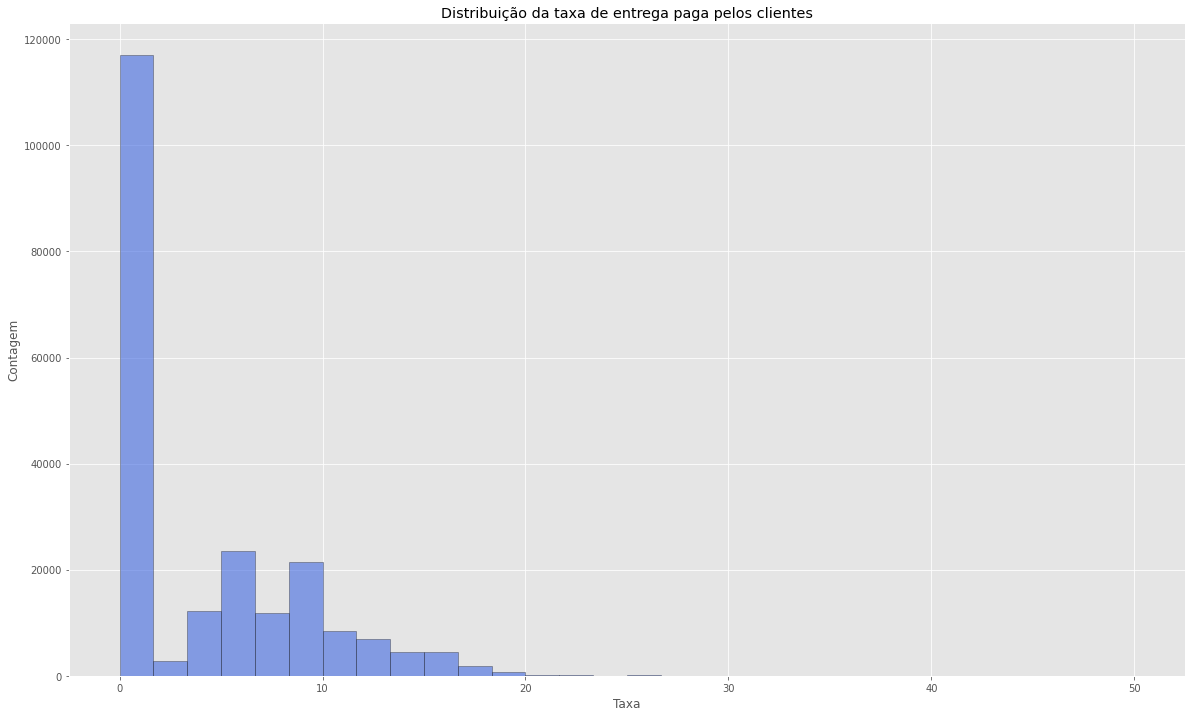

In [22]:
#for x in ['delivery_fee', 'total_amount', 'subsidy_amount', 'pedido_sem_desc', 'device_enconde', 'entrega_enc']
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df1['delivery_fee'].hist(bins = 30, ec = "k", alpha = .6, color = "royalblue")
plt.title('Distribuição da taxa de entrega paga pelos clientes')
plt.xlabel("Taxa")
plt.ylabel("Contagem")

Podemos notar que a maioria das taxas de entrega paga pelos clientes são baixas (menos de R$ 5,00)

Text(0, 0.5, 'Contagem')

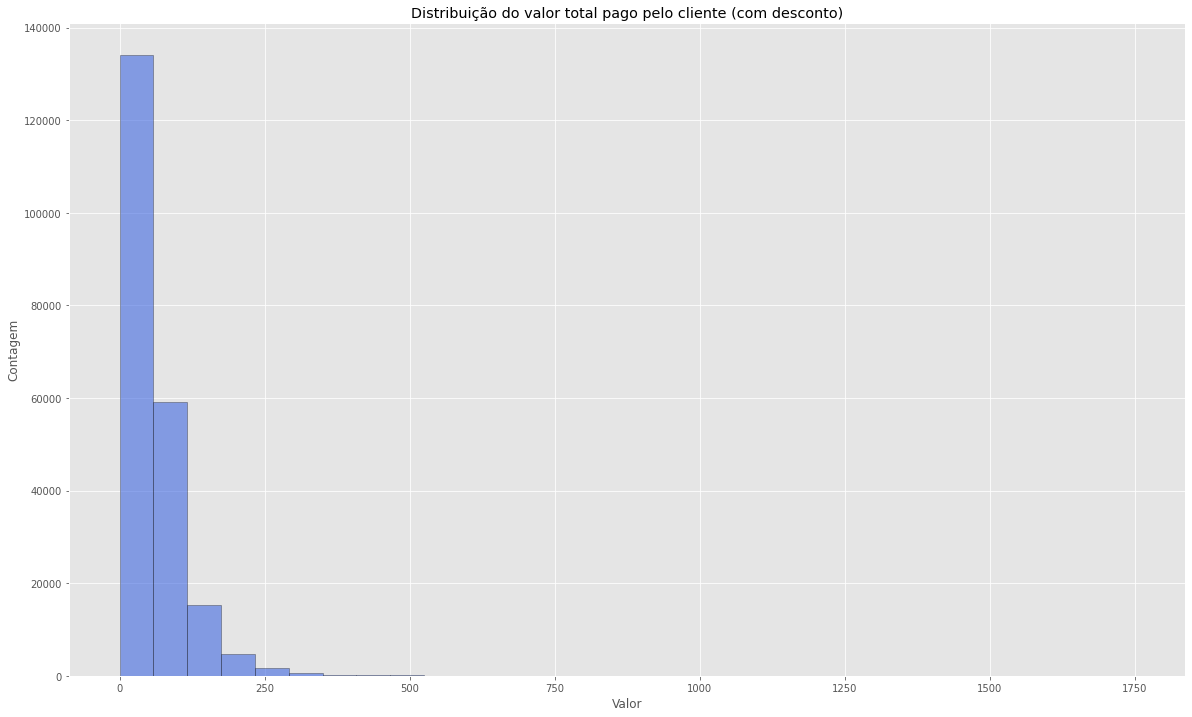

In [23]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df1['total_amount'].hist(bins = 30, ec = "k", alpha = .6, color = "royalblue")
plt.title('Distribuição do valor total pago pelo cliente (com desconto)')
plt.xlabel("Valor")
plt.ylabel("Contagem")

A maioria dos pedidos possui um valor de até mais ou menos R$ 60,00

Text(0, 0.5, 'Contagem')

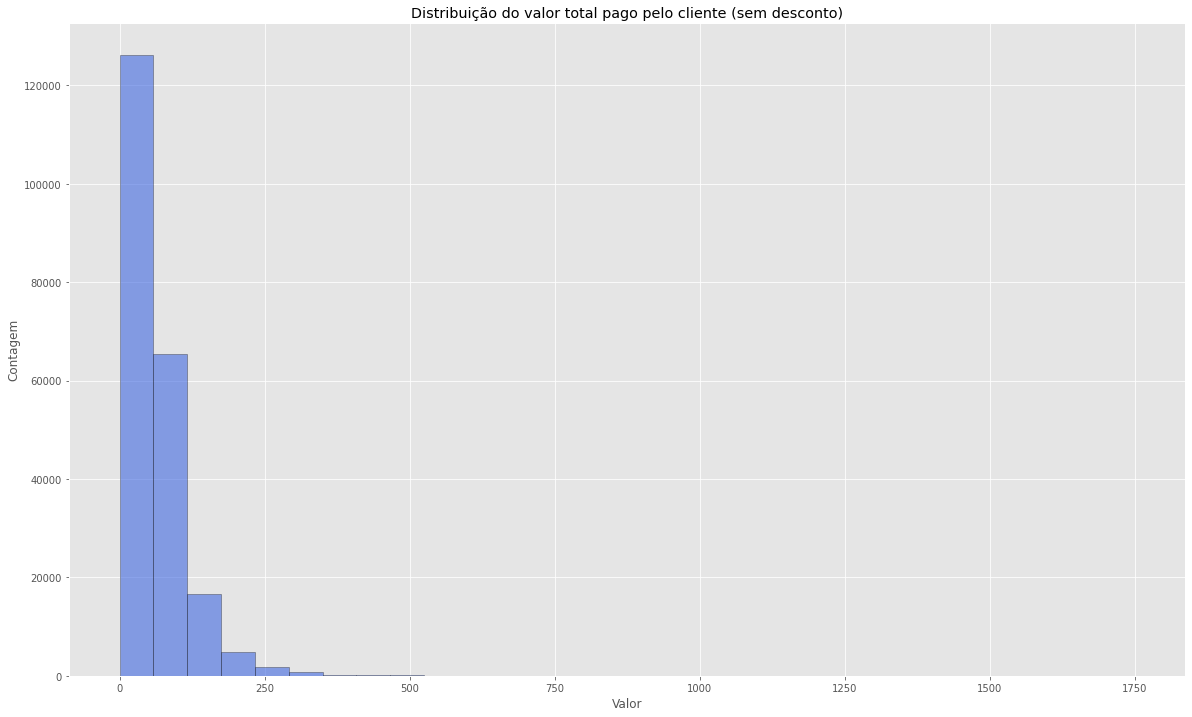

In [24]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df1['pedido_sem_desc'].hist(bins = 30, ec = "k", alpha = .6, color = "royalblue")
plt.title('Distribuição do valor total pago pelo cliente (sem desconto)')
plt.xlabel("Valor")
plt.ylabel("Contagem")

Text(0, 0.5, 'Contagem')

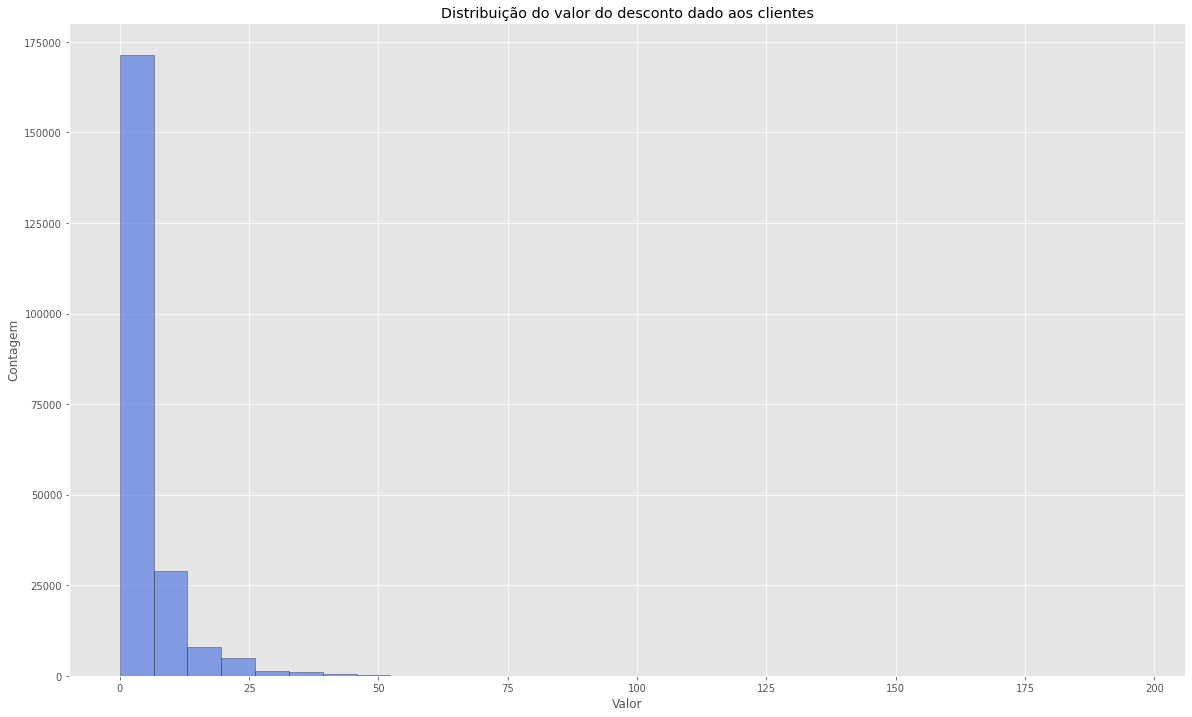

In [25]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df1['subsidy_amount'].hist(bins = 30, ec = "k", alpha = .6, color = "royalblue")
plt.title('Distribuição do valor do desconto dado aos clientes')
plt.xlabel("Valor")
plt.ylabel("Contagem")

Os descontos dados, em sua grande maioria, não passam de R$ 10,00.


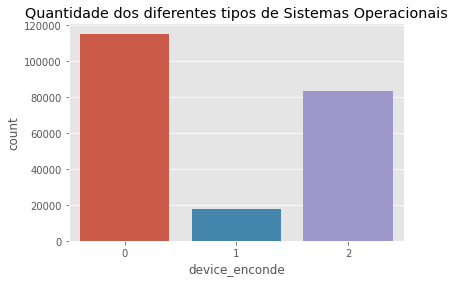

In [46]:
sns.countplot(df1['device_enconde'])
plt.title('Quantidade dos diferentes tipos de Sistemas Operacionais');

Na variável device_enconde, temos:

0 - ANDROID

1 - DESKTOP

2 - IOS

Sendo assim, podemos ver que a maioria dos pedidos são feitos por pessoas usuárias do sistema android, seguido por pessoas usuárias do sistema IOS e a minoria utiliza o Ifood pelo desktop.

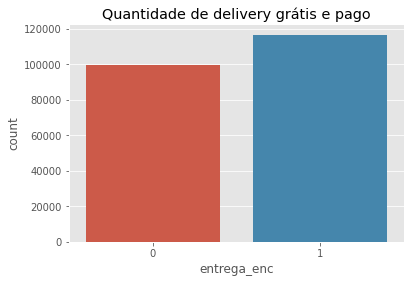

In [49]:
sns.countplot(df1['entrega_enc'])
plt.title('Quantidade de delivery grátis e pago');

Na variável entrega_enc, temos:

0 - SEM FRETE GRÁTIS

1 - COM FRETE GRÁTIS

Portando, percebemos que a maioria dos pedidos realizados possuem  frete grátis

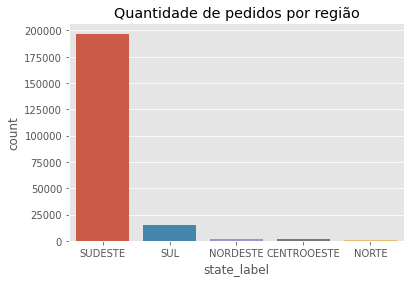

In [50]:
sns.countplot(df1['state_label']);
plt.title('Quantidade de pedidos por região');

Os dados são majoritariamente da região Sudeste.

#MACHINE LEARNING - UTILIZANDO O KMEANS

MÉTODO ELBOW CURVE PARA SELECIONAR O NÚMERO IDEAL DE CLUSTERS

In [29]:
#X2 = df1[['entrega_enc', 'device_enconde','subsidy_amount', 'pedido_sem_desc', 'delivery_fee']].iloc[:,:].values
X2 = df1[['delivery_fee','pedido_sem_desc']].iloc[:,:].values
inertia = []
for n in range (1,11):
    alg = (KMeans(n_clusters = n))
    alg.fit(X2)
    inertia.append(alg.inertia_)

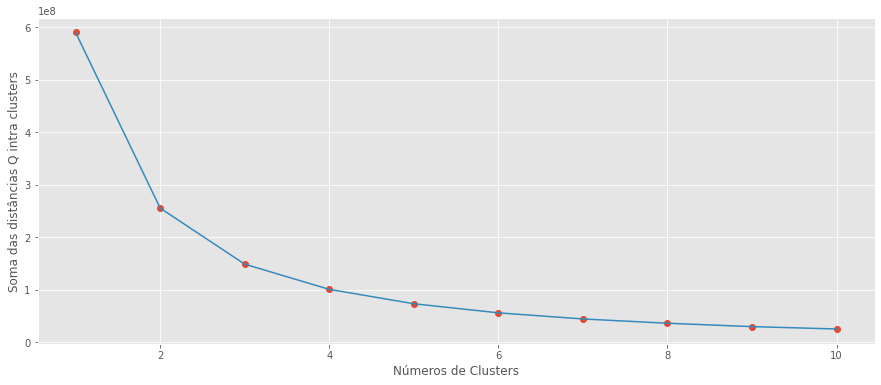

In [30]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-')
plt.xlabel('Números de Clusters'), plt.ylabel('Soma das distâncias Q intra clusters')
plt.show()

A partir do método acima, podemos perceber que a quantidade ideal de cluster é 3.

TREINANDO O MODELO:

In [31]:
algoritmo = (KMeans(n_clusters = 3))
algoritmo.fit(X2)

KMeans(n_clusters=3)

#ANÁLISE DAS PERSONAS 

CRIANDO UMA NOVA COLUNA COM AS LABELS DO CLUSTER:

In [32]:
df1['clusters'] = algoritmo.labels_

GROUPBY PARA ANALISAR AS PERSONAS:

In [33]:
df_group = df1[['subsidy_amount', 'pedido_sem_desc', 'delivery_fee', 'clusters']].groupby('clusters')

MÉDIA DOS VALORES DE DESCONTO, DO PEDIDO E DO DELIVERY EM CADA CLUSTER:

In [34]:
df_group.mean()

,subsidy_amount,pedido_sem_desc,delivery_fee
clusters,,,
0,3.379081,39.042170,2.857003
1,4.081422,101.743350,6.126803
2,3.560729,235.737329,8.128217


QUANTIDADE DE ENTREGA GRÁTIS PARA O CLUSTER 0:

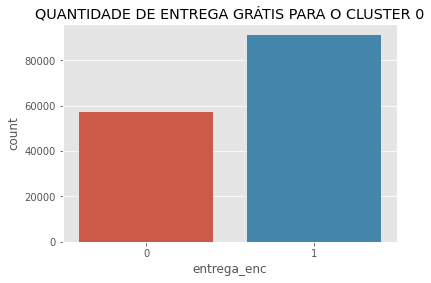

In [51]:
filtro1 = df1['clusters'] == 0
df_filt1 = df1[filtro1]
df_filt1['entrega_enc']
sns.countplot(df_filt1['entrega_enc'])
plt.title('QUANTIDADE DE ENTREGA GRÁTIS PARA O CLUSTER 0');

QUANTIDADE DE ENTREGAS GRÁTIS PARA O CLUSTER 1:

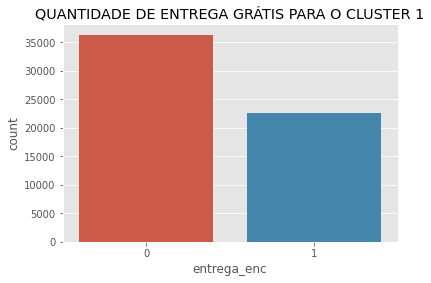

In [52]:
filtro2 = df1['clusters'] == 1
df_filt2 = df1[filtro2]
df_filt2['entrega_enc']
sns.countplot(df_filt2['entrega_enc'])
plt.title('QUANTIDADE DE ENTREGA GRÁTIS PARA O CLUSTER 1');

QUANTIDADE DE ENTREGAS GRÁTIS PARA O CLUSTER 2

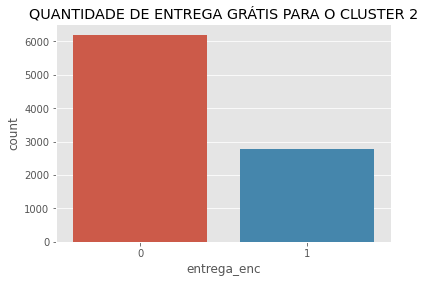

In [53]:
filtro3 = df1['clusters'] == 2
df_filt3 = df1[filtro3]
df_filt3['entrega_enc']
sns.countplot(df_filt3['entrega_enc'])
plt.title('QUANTIDADE DE ENTREGA GRÁTIS PARA O CLUSTER 2');

QUANTIDADE DOS DIFERENTES TIPOS DE SISTEMAS OPERACIONAIS UTILIZADOS NO CLUSTER 0:

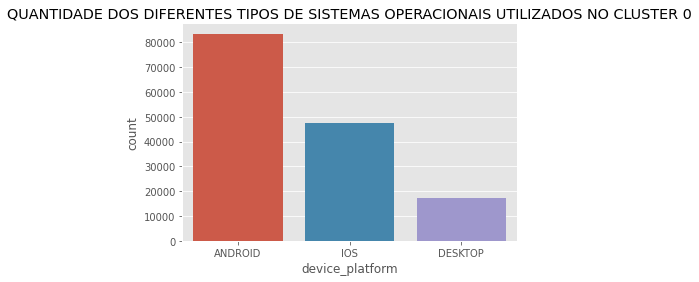

In [54]:
filtro4 = df1['clusters'] == 0
df_filt4 = df1[filtro4]
df_filt4['device_platform']
sns.countplot(df_filt4['device_platform'])
plt.title('QUANTIDADE DOS DIFERENTES TIPOS DE SISTEMAS OPERACIONAIS UTILIZADOS NO CLUSTER 0');

QUANTIDADE DOS DIFERENTES TIPOS DE SISTEMAS OPERACIONAIS UTILIZADOS NO CLUSTER 1

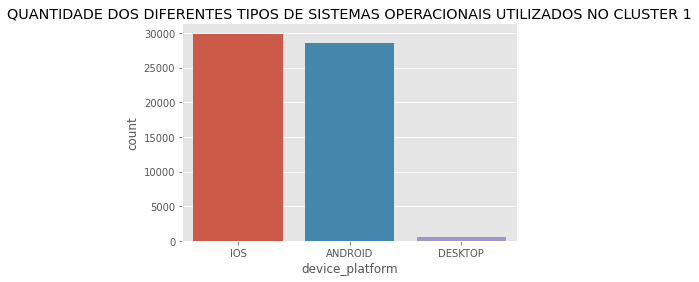

In [55]:
filtro5 = df1['clusters'] == 1
df_filt5 = df1[filtro5]
df_filt5['device_platform']
sns.countplot(df_filt5['device_platform'])
plt.title('QUANTIDADE DOS DIFERENTES TIPOS DE SISTEMAS OPERACIONAIS UTILIZADOS NO CLUSTER 1');

QUANTIDADE DOS DIFERENTES TIPOS DE SISTEMAS OPERACIONAIS UTILIZADOS NO CLUSTER 2

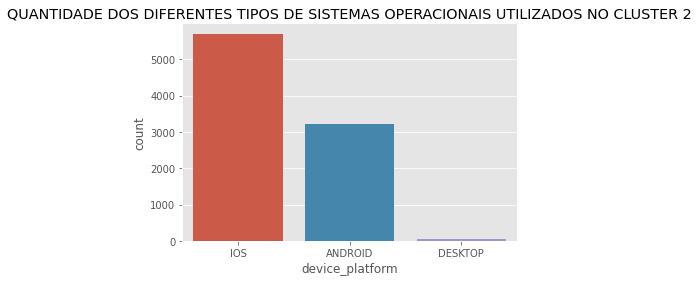

In [56]:
filtro6 = df1['clusters'] == 2
df_filt6 = df1[filtro6]
df_filt6['device_platform']
sns.countplot(df_filt6['device_platform'])
plt.title('QUANTIDADE DOS DIFERENTES TIPOS DE SISTEMAS OPERACIONAIS UTILIZADOS NO CLUSTER 2');

QUANTIDADE DE PEDIDOS POR PERÍODO DO DIA NO CLUSTER 0:

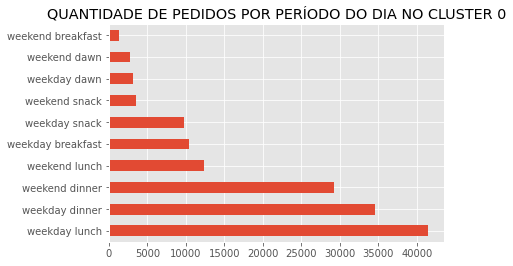

In [57]:
filtro7 = df1['clusters'] == 0
df_filt7 = df1[filtro7]
df_filt7['order_shift'].value_counts().plot(kind='barh')
plt.title('QUANTIDADE DE PEDIDOS POR PERÍODO DO DIA NO CLUSTER 0');

QUANTIDADE DE PEDIDOS POR PERÍODO DO DIA NO CLUSTER 1

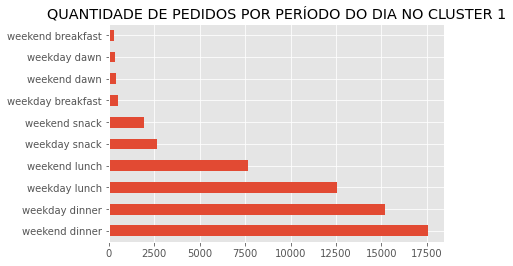

In [58]:
filtro8 = df1['clusters'] == 1
df_filt8 = df1[filtro8]
df_filt8['order_shift'].value_counts().plot(kind='barh')
plt.title('QUANTIDADE DE PEDIDOS POR PERÍODO DO DIA NO CLUSTER 1');

QUANTIDADE DE PEDIDOS POR PERÍODO DO DIA NO CLUSTER 2

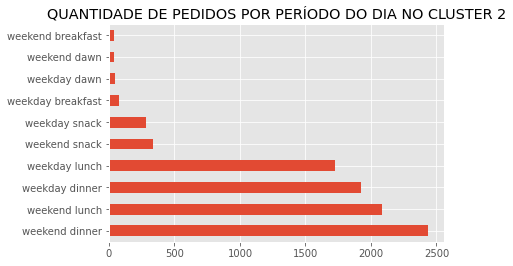

In [59]:
filtro9 = df1['clusters'] == 2
df_filt9 = df1[filtro9]
df_filt9['order_shift'].value_counts().plot(kind='barh')
plt.title('QUANTIDADE DE PEDIDOS POR PERÍODO DO DIA NO CLUSTER 2');

Portanto, a conclusão que podemos tirar dessa análise é que existem **3 diferentes tipos de clientes (personas)** que utilizam o Ifood:

**Persona 1 (cluster 1):**

Possui um ticket médio de R$ 39,18 e preferência pelos restaurantes que oferecem frete grátis. Utiliza mais os celulares com ANDROID para fazer os pedidos e, além disso, realiza os pedidos predominantemente na hora do almoço e janta, na maioria das vezes em dias úteis.

**Persona 2 (cluster 0):**

Possui um ticket médio de R$ 102,34, possui mais pedidos com delivery pago do que com delivery grátis e utiliza quase que igualmente os sistemas operacionais IOS e ANDROID para realizar os pedidos. Ela costuma fazer os pedidos, majoritariamente, no horário da janta tanto em dias de semana, quanto aos fins de semana.

**Persona 3 (cluster 2):**

Possui um ticket médio de R$ 237,78, tem mais pedidos com delivery pago do que com delivery grátis e utiliza mais o sistema operacional IOS para realizá-los. A maioria de seus pedidos são aos fins de semana, no horário de almoço e também no jantar.

In [44]:
df1.groupby('state_label')['clusters'].value_counts(1)

state_label  clusters
CENTROOESTE  0           0.612424
             1           0.327481
             2           0.060095
NORDESTE     0           0.652896
             1           0.302944
             2           0.044160
NORTE        0           0.610526
             1           0.329323
             2           0.060150
SUDESTE      0           0.686154
             1           0.272079
             2           0.041768
SUL          0           0.694296
             1           0.270491
             2           0.035213
Name: clusters, dtype: float64

Podemos perceber, também, que há um padrão para todas as regiões do Brasil: sendo predominante a persona do Cluster 1, seguida do Cluster 0 e Cluster 2. Ou seja, a proporção do tipo de personas se repete em todo o Brasil.